In [16]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# displays logos inline within the notebook;
# remove if using a python interpreter instead
%matplotlib inline

# logomaker import
import logomaker

import warnings
warnings.filterwarnings("ignore")

In [38]:
df = pd.read_csv("./AbasicSitesMtDNAcontext_HLcompare.csv", sep=";").sort_values("avgH")
df

,tripletH,origtriH,countH,deepcountH,avgH,tripletL,countL,deepcountL,avgL
9,aCt,aGt,59,107,1.813559,aCt,83,214,2.578313
0,tTt,aAa,281,718,2.555160,tTt,91,199,2.186813
41,aCc,gGt,34,87,2.558824,aCc,75,193,2.573333
49,aTg,cAt,159,458,2.880503,aTg,57,142,2.491228
25,aCa,tGt,61,185,3.032787,aCa,102,265,2.598039
...,...,...,...,...,...,...,...,...,...
59,gCg,cGc,60,1428,23.800000,gCg,17,158,9.294118
54,cAg,cTg,101,2459,24.346535,cAg,125,1250,10.000000
30,cGa,tCg,67,1654,24.686567,cGa,35,235,6.714286
22,cAa,tTg,81,2904,35.851852,cAa,212,1966,9.273585


In [97]:
df_h = df[["origtriH", "avgH"]]
# df_h = df_h[df_h.avgH > df_h.avgH.mean()]

df_h[0] = df_h.origtriH.str.get(0).str.capitalize()
df_h[1] = df_h.origtriH.str.get(1).str.capitalize()
df_h[2] = df_h.origtriH.str.get(2).str.capitalize()
df_h = df_h.melt(["origtriH", "avgH"], [0, 1, 2], "pos", "nuc")

df_h_wide = df_h.groupby(["pos", "nuc"]).avgH.mean().unstack().fillna(0)
df_h_wide = (df_h_wide.T / df_h_wide.sum(axis=1)).T
df_h_wide

nuc,A,C,G,T
pos,,,,
0,0.180624,0.336679,0.185266,0.297430
1,0.135805,0.342389,0.208037,0.313770
2,0.170346,0.331964,0.395014,0.102676


In [98]:
df_h[df_h.pos == 1].sort_values(["avgH"]).tail(10)#.nuc.value_counts()

,origtriH,avgH,pos,nuc
118,tGg,17.144928,1,G
119,aCg,17.520408,1,C
120,tTc,18.319372,1,T
121,cCc,19.021186,1,C
122,cTc,22.271186,1,T
123,cGc,23.800000,1,G
124,cTg,24.346535,1,T
125,tCg,24.686567,1,C
126,tTg,35.851852,1,T
127,cCg,38.983333,1,C


In [99]:
df_h.sort_values(["origtriH", "pos"]).head(9)

,origtriH,avgH,pos,nuc
1,aAa,2.555160,0,A
65,aAa,2.555160,1,A
129,aAa,2.555160,2,A
25,aAc,5.875989,0,A
89,aAc,5.875989,1,A
153,aAc,5.875989,2,C
17,aAg,4.226415,0,A
81,aAg,4.226415,1,A
145,aAg,4.226415,2,G


Text(0, 0.5, 'probability')

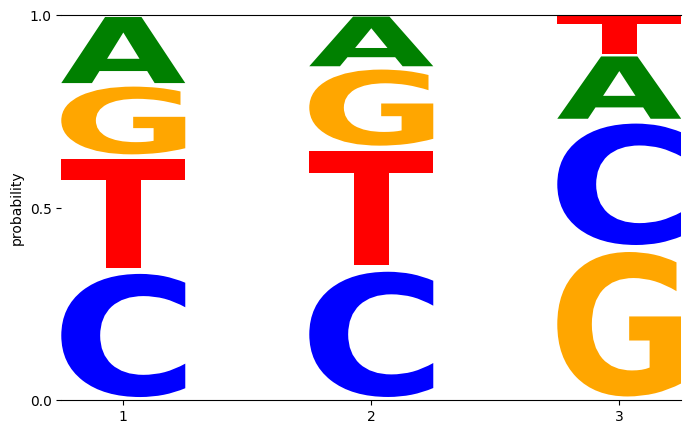

In [101]:
# load ss probability matrix
# ss_df = logomaker.get_example_matrix('ss_probability_matrix',
#                                      print_description=False)
ss_df = df_h_wide

# create Logo object
ss_logo = logomaker.Logo(ss_df,
                         width=.5,
                         vpad=.05,
                        #  fade_probabilities=True,
                         stack_order='small_on_top',
                         figsize=[8, 5]
                        #  color_scheme='dodgerblue',
                        #  font_name='Rosewood Std'
)

# style using Logo methods
ss_logo.style_spines(spines=['left', 'right'], visible=False)

# style using Axes methods
ss_logo.ax.set_xticks(range(len(ss_df)))
# ss_logo.ax.set_xticklabels('%+d'%x for x in [-3, -2, -1, 1, 2, 3, 4, 5, 6])
ss_logo.ax.set_xticklabels([1, 2, 3])
ss_logo.ax.set_yticks([0, .5, 1])
# ss_logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
ss_logo.ax.set_ylabel('probability')

Text(0, 0.5, 'probability')

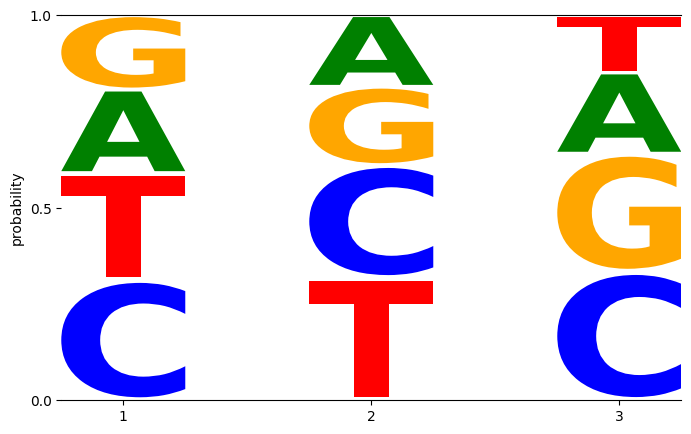

In [102]:
df_l = df[["origtriH", "avgL"]]
df_l[0] = df_l.origtriH.str.get(0).str.capitalize()
df_l[1] = df_l.origtriH.str.get(1).str.capitalize()
df_l[2] = df_l.origtriH.str.get(2).str.capitalize()
df_l = df_l.melt(["origtriH", "avgL"], [0, 1, 2], "pos", "nuc")

df_l_wide = df_l.groupby(["pos", "nuc"]).avgL.mean().unstack()
df_l_wide = (df_l_wide.T / df_l_wide.sum(axis=1)).T


# create Logo object
ss_logo = logomaker.Logo(df_l_wide,
                         width=.5,
                         vpad=.05,
                        #  fade_probabilities=True,
                         stack_order='small_on_top',
                         figsize=[8, 5]
                        #  color_scheme='dodgerblue',
                        #  font_name='Rosewood Std'
)

# style using Logo methods
ss_logo.style_spines(spines=['left', 'right'], visible=False)

# style using Axes methods
ss_logo.ax.set_xticks(range(len(df_l_wide)))
# ss_logo.ax.set_xticklabels('%+d'%x for x in [-3, -2, -1, 1, 2, 3, 4, 5, 6])
ss_logo.ax.set_xticklabels([1, 2, 3])
ss_logo.ax.set_yticks([0, .5, 1])
# ss_logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
ss_logo.ax.set_ylabel('probability')

In [103]:
df_l[df_l.pos == 1].sort_values(["avgL"]).tail(10)#.nuc.value_counts()

,origtriH,avgL,pos,nuc
119,aCg,7.230769,1,C
117,tCc,8.440860,1,C
121,cCc,8.488889,1,C
120,tTc,9.232759,1,T
126,tTg,9.273585,1,T
123,cGc,9.294118,1,G
124,cTg,10.000000,1,T
115,aCc,10.189655,1,C
127,cCg,10.558140,1,C
122,cTc,11.844156,1,T
